In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
import uproot


plt.rcParams["figure.figsize"] = (10, 8)


In [2]:
def get_theta(eta):
    return 2*np.arctan(np.exp(-eta))
def get_eta(theta):
    return -np.log(np.tan(theta/2))
from scipy.optimize import curve_fit

In [3]:
def gauss(x, A,mu, sigma):
    return A * np.exp(-(x-mu)**2/(2*sigma**2))

def Landau(x, normalization,location,stdev):
    #print(type(x))
    u=(x-location)*3.591/stdev/2.355
    renormalization = 1.64872*normalization
    return renormalization * np.exp(-u/2 - np.exp(-u)/2)

In [4]:
(-176+178.875)//.125+1

24.0

In [5]:
import uproot as ur
arrays={}
for E in 0.9, 2, 5, 10, 18:
    for theta in 178, 178.73:
    #     #events = ur.open(f'add_flange/insert_reco_e-_{E}GeV_theta_{theta}-{theta}deg.edm4hep.root:events')
    #     #events = ur.open(f'06212023/insert_reco_e-_{E}GeV_theta_{theta}-{theta}deg.edm4hep.root:events')
        events=ur.open(f'10302023_energy_scan/insert_reco_e-_{E}GeV_theta_{theta}-{theta}deg.edm4hep.root:events')
        arrays[(E,"no_beampipe",theta)] = events.arrays()
        events=ur.open(f'10302023_energy_scan_with_beampipe_flange/insert_reco_e-_{E}GeV_theta_{theta}-{theta}deg.edm4hep.root:events')
        arrays[(E,"beampipe",theta)] = events.arrays()

thetas="177.125 177.250 177.375 177.500 177.625 177.750 177.875 178.000 178.125 178.250 178.375 178.500 178.625 178.750 178.775".split()\
       +"178.800 178.825 178.850 178.875 178.900 178.925 178.950 178.975 179.000 179.025 179.050".split()
thetas=np.array([float(theta) for theta in thetas])
for theta in thetas:
    E=5
    events = ur.open(f'10302023_theta_scan_with_beampipe_flange/insert_reco_e-_{E}GeV_theta_{theta:.3f}-{theta:.3f}deg.edm4hep.root:events')
    arrays[(E,"beampipe",theta)] = events.arrays()
    events = ur.open(f'10292023_thetascan/insert_reco_e-_{E}GeV_theta_{theta:.3f}-{theta:.3f}deg.edm4hep.root:events')
    arrays[(E,"no_beampipe",theta)] = events.arrays()


In [6]:
import os
try:
    os.mkdir("images")
except:
    pass

In [7]:
def get_spread(a):
    E=a['BackwardsEcalInsertHitsReco.energy']
    x=a['BackwardsEcalInsertHitsReco.position.x']
    y=a['BackwardsEcalInsertHitsReco.position.y']
    isH=a['BackwardsEcalInsertHitsReco.dimension.x']>20
    isV=a['BackwardsEcalInsertHitsReco.dimension.y']>20
    avgX=np.sum(E*x*isV, axis=-1)/np.sum(E*isV, axis=-1)
    avgY=np.sum(E*y*isH, axis=-1)/np.sum(E*isH, axis=-1)
    spreadX=np.sqrt(np.sum(E*(x-avgX)**2*isV, axis=-1)/np.sum(E*isV, axis=-1))
    spreadY=np.sqrt(np.sum(E*(y-avgY)**2*isH, axis=-1)/np.sum(E*isH, axis=-1))
    spread=np.hypot(spreadX, spreadY)
    return spread

In [8]:
#CALICE data
csvString="""
x,y
0.177578,2.50831
0.184753,2.59382
0.226009,3.04988
0.260090,3.53444
0.292377,3.70546
0.356951,4.44656
0.502242,6.21378
0.708520,9.03563
0.175785,2.82185
0.182960,2.87886
0.226009,3.33492
0.260090,3.84798
0.290583,4.01900
0.355157,4.76010
0.500448,6.52732
0.708520,9.32067"""
from io import StringIO
csvStringIO = StringIO(csvString)
df = pd.read_csv(csvStringIO, sep=",")
E=list(1/(df.x[:len(df)//2])**2)
res=list(df.y[:len(df)//2])
dres=list(df.y[len(df)//2:]-res)
df_CALICE= pd.DataFrame({"E": E, "res":res, "dres":dres})
print(df_CALICE.E)

0    31.711857
1    29.296585
2    19.577108
3    14.782663
4    11.698053
5     7.848430
6     3.964368
7     1.992030
Name: E, dtype: float64


In [9]:
# spreadXs=[]
# spreadYs=[]
# key=(5,178)
# for event in range(10):
#     E=arrays[key]['BackwardsEcalInsertHitsReco.energy'][event,:]
#     x=arrays[key]['BackwardsEcalInsertHitsReco.position.x'][event,:]
#     y=arrays[key]['BackwardsEcalInsertHitsReco.position.y'][event,:]
#     z=arrays[key]['BackwardsEcalInsertHitsReco.position.z'][event,:]
#     z2=sorted(z)[1]
#     isXlayer=(arrays[key]['BackwardsEcalInsertHitsReco.dimension.x'][event,:]<20)
#     isYlayer=(arrays[key]['BackwardsEcalInsertHitsReco.dimension.y'][event,:]<20)
    
#     x0=np.average(E*x*isXlayer, weights=E*isXlayer)
#     y0=np.average(E*y*isYlayer, weights=E*isYlayer)
#     plt.hist((x-x0), weights=E*isXlayer, bins=160, range=(-800,800))
#     plt.show()
# #plt.hist(spreadXs,histtype='step')
# #plt.show()
# #plt.hist(spreadYs, histtype='step')
# #plt.show()

In [10]:
# spreadXs=[]
# spreadYs=[]
# key=(5,178)
# for event in range(len(arrays[key])):
#     E=arrays[key]['BackwardsEcalInsertHitsReco.energy'][event,:]
#     x=arrays[key]['BackwardsEcalInsertHitsReco.position.x'][event,:]
#     y=arrays[key]['BackwardsEcalInsertHitsReco.position.y'][event,:]
#     isXlayer=arrays[key]['BackwardsEcalInsertHitsReco.dimension.x'][event,:]<20
#     isYlayer=arrays[key]['BackwardsEcalInsertHitsReco.dimension.y'][event,:]<20
#     if sum(isXlayer)== 0:
#         continue
#     x0=np.average(E*x*isXlayer, weights=E*isXlayer)
#     y0=np.average(E*y*isYlayer, weights=E*isYlayer)
#     spreadXs.append(np.sqrt(np.sum((x-x0)**2*E*isXlayer)/np.sum(E*isXlayer)))
#     spreadYs.append(np.sqrt(np.sum((y-y0)**2*E*isYlayer)/np.sum(E*isYlayer)))
# plt.hist(spreadXs,histtype='step')
# plt.show()
# plt.hist(spreadYs, histtype='step')
# plt.show()

/usr/local/lib/python3.8/dist-packages/awkward/_connect/numpy.py:395: RuntimeWarning: invalid value encountered in divide
  result = impl(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/awkward/_connect/numpy.py:395: RuntimeWarning: invalid value encountered in divide
  result = impl(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/awkward/_connect/numpy.py:395: RuntimeWarning: invalid value encountered in divide
  result = impl(*args, **kwargs)


theta=177.125, eta=-3.69,  spreadcut eff=1.0
theta=177.25, eta=-3.73,  spreadcut eff=1.0
theta=177.375, eta=-3.78,  spreadcut eff=0.998
theta=177.5, eta=-3.82,  spreadcut eff=0.998
theta=177.625, eta=-3.88,  spreadcut eff=0.998
theta=177.75, eta=-3.93,  spreadcut eff=0.99
theta=177.875, eta=-3.99,  spreadcut eff=0.92
theta=178.0, eta=-4.05,  spreadcut eff=0.876
theta=178.125, eta=-4.11,  spreadcut eff=0.87
theta=178.25, eta=-4.18,  spreadcut eff=0.844
theta=178.375, eta=-4.26,  spreadcut eff=0.82
theta=178.5, eta=-4.34,  spreadcut eff=0.806
theta=178.625, eta=-4.42,  spreadcut eff=0.724
theta=178.75, eta=-4.52,  spreadcut eff=0.594
theta=178.775, eta=-4.54,  spreadcut eff=0.51
theta=178.8, eta=-4.56,  spreadcut eff=0.494
theta=178.825, eta=-4.58,  spreadcut eff=0.438
theta=178.85, eta=-4.60,  spreadcut eff=0.392
theta=178.875, eta=-4.62,  spreadcut eff=0.406
theta=178.9, eta=-4.65,  spreadcut eff=0.372
theta=178.925, eta=-4.67,  spreadcut eff=0.478
theta=178.95, eta=-4.69,  spreadcut e

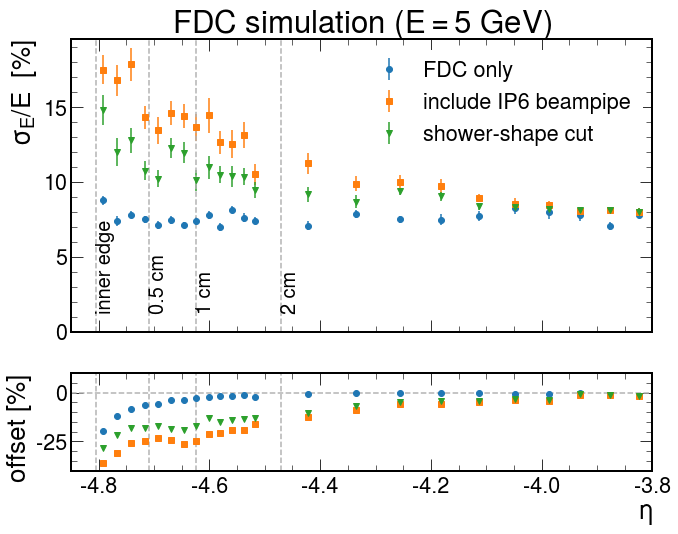

In [11]:
clearance=0.5
R1=4.53
#R1=4.5
z=-307
show=False

var='theta'
sf=0.0328
fig,axs= plt.subplots(2,1, gridspec_kw=dict(height_ratios=[3,1]),sharex='all')

energies=  (18,0.9, 2, 5, 10) if var == "E" else (5,)

#check all values of theta that have been simulated
# all_thetas=[]
# for key in arrays:
#     if key[0]==5 and key not in all_thetas:

#         all_thetas.append(key[2])
# all_thetas=np.array(sorted(all_thetas))[:-2]

# thetas= all_thetas if var == "theta" else (178,)


for geom, spreadcut in ("no_beampipe", None),("beampipe", None), ("beampipe", 35):
    Eresfracs=[]
    dEresfracs=[]

    mus=[]
    dmus=[]
    Esums={}




    for theta in thetas:

        for E in energies:
            spread=get_spread(arrays[(E,geom,theta)])
            fnc=gauss
            Esums[E]=[]
            for event in range(len(arrays[(E,geom,theta)])):
                Esum=np.sum(arrays[(E,geom,theta)]['BackwardsEcalInsertHitsReco.energy'][event,:])
                #print(Esum)
                MC_E=np.sqrt(sum(arrays[(E,geom,theta)][f"MCParticles.momentum.{a}"][event,2]**2 for a in "xyz"))
                #print(MC_E)
                if spreadcut is not None and spread[event]>spreadcut:
                    continue
                Esums[E].append(Esum)
            if spreadcut:
                print(f"theta={theta}, eta={get_eta(theta*np.pi/180):.2f},  spreadcut eff={len(Esums[E])/len(arrays[(E,geom, theta)])}")
            Esums[E]=np.array(Esums[E])
            if sf==None:
                sf=np.mean(Esums[E][Esums[E]>0.1*np.mean(Esums[E])])/E
            #print(f"sampling fraction={sf:.4f}")
            Ereco=Esums[E]/sf
            #print(Ereco)
            #print(sf)
            h,x=np.histogram(Ereco, bins=30 if E<5 else 50 if E<18 else 70, range=(0.2*E, 2*E))
            #print(h,x)
            bc=(x[1:]+x[:-1])/2
            p0=[E,np.mean(Ereco), np.std(Ereco)*.8]


            slc=(h>0) & (abs(bc-np.mean(Ereco))<3*np.std(Ereco))

            coeff, var_matrix = curve_fit(fnc, bc[slc], h[slc], p0=p0,
                                     sigma=np.sqrt(h[slc]))
            if show:
                plt.subplots(1,1)
                plt.errorbar(bc, h, np.sqrt(h), marker='o', ls='', 
                             label=f'$E_{{\\rm sim}}$={E} GeV,\n$\\eta=-4.0$' if var=='E'\
                            else f'$E_{{\\rm sim}}$={E} GeV,\n$\\theta={theta:.3f}^{{\\circ}}$')

            Eresfracs.append(coeff[2]/E)
            dEresfracs.append(np.sqrt(var_matrix[2][2])/E)

            mus.append(coeff[1]/E)
            dmus.append(np.sqrt(var_matrix[1][1])/E)

            x=np.linspace(0, 2*E, 100)
            if show: plt.plot(x, fnc(x,*coeff), label=f"fit:   $\\frac{{\\sigma_E}}{{E}}={100*Eresfracs[-1]:.1f}\\pm {100*dEresfracs[-1]:.1f}\%$")
            chi2=sum((fnc(bc[slc],*coeff)-h[slc])**2/h[slc])
            ndof = len(bc[slc])-len(coeff)
            from scipy.stats import chi2 as c2
            #print(f"chi2={chi2:.3f}, ndof={ndof}, pval={c2.sf(chi2,ndof):.3}")
            if show: 
                plt.xlabel("$E_{\\rm reco}$ [GeV]")
                plt.ylabel("Events")
                plt.legend(loc='upper left')
                if var=='E':
                    plt.savefig(f"images/E_res_slice_{E}_GeV.pdf")
                if show: plt.show()

    mus=np.array(mus)
    dmus=np.array(dmus)

    #s=sf#np.median(mus) #fit the mean to be 1.  This is equivalent to doing a calibration of sorts

    #mus/=sf
    #dmus/=sf

    Eresfracs=np.array(Eresfracs)
    dEresfracs=np.array(dEresfracs)


    plt.sca(axs[0])
    if geom=="no_beampipe":
        label='FDC only'
        marker='o'
    elif geom=="beampipe" and not spreadcut:
        label="include IP6 beampipe"
        marker='s'
    else:
        label="shower-shape cut"
        marker='v'
    plt.errorbar(get_eta(thetas*np.pi/180), Eresfracs*100, np.array(dEresfracs)*100, marker=marker, 
                 ls='',label=label)
    axs[1].errorbar(get_eta(thetas*np.pi/180), np.array(mus)*100-100, np.array(dmus)*100, marker=marker, ls='')
    
axs[1].set_xlabel("$\\eta$")

for d in 0, 0.5, 1, 2:
    eta=get_eta(np.pi-np.arctan((d+clearance+R1)/abs(z)))
    plt.axvline(eta, linestyle='--', color='0.7')
    axs[1].axvline(eta, linestyle='--', color='0.7')
    if d:
        plt.text(eta, 1.5, f"{d} cm", rotation=90, fontsize=20)
    else:
        plt.text(eta, 1.5, f"inner edge", rotation=90, fontsize=20)
plt.xlim(-4.85, -3.8)
axs[1].set_ylabel("offset [%]")

#axs[1].set_ylim(-12, 12)

axs[1].axhline(0, ls='--', color='0.7')

plt.ylabel("${\\sigma_E}/{E}$  [%]")
plt.legend(loc= 'upper right' if var == 'E' else 'upper right', 
           facecolor='white', framealpha=1, frameon=1, edgecolor='w')
axs[0].set_title("FDC simulation ($E=5$ GeV)")
axs[1].set_ylim(-40, 10)
axs[0].set_ylim(0)
plt.tight_layout()
plt.savefig(f"images/E_res_vs_{var}.pdf")
plt.show()

/usr/local/lib/python3.8/dist-packages/awkward/_connect/numpy.py:395: RuntimeWarning: invalid value encountered in divide
  result = impl(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/awkward/_connect/numpy.py:395: RuntimeWarning: invalid value encountered in divide
  result = impl(*args, **kwargs)


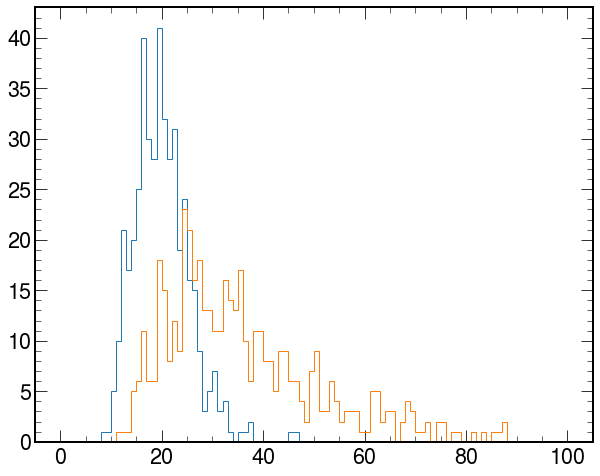

In [12]:
nbp=arrays[(5, "no_beampipe", 178.75)]
bp=arrays[(5, "beampipe", 178.75)]

for a in nbp, bp:
    E=a['BackwardsEcalInsertHitsReco.energy']
    x=a['BackwardsEcalInsertHitsReco.position.x']
    y=a['BackwardsEcalInsertHitsReco.position.y']
    isH=a['BackwardsEcalInsertHitsReco.dimension.x']>20
    isV=a['BackwardsEcalInsertHitsReco.dimension.y']>20
    avgX=np.sum(E*x*isV, axis=-1)/np.sum(E*isV, axis=-1)
    avgY=np.sum(E*y*isH, axis=-1)/np.sum(E*isH, axis=-1)
    spreadX=np.sqrt(np.sum(E*(x-avgX)**2*isV, axis=-1)/np.sum(E*isV, axis=-1))
    spreadY=np.sqrt(np.sum(E*(y-avgY)**2*isH, axis=-1)/np.sum(E*isH, axis=-1))
    spread=np.hypot(spreadX, spreadY)
    plt.hist(spread, bins=100, histtype='step', range=(0,100))
    


sampling fraction=0.0328
chi2=6.664, ndof=7, pval=0.465


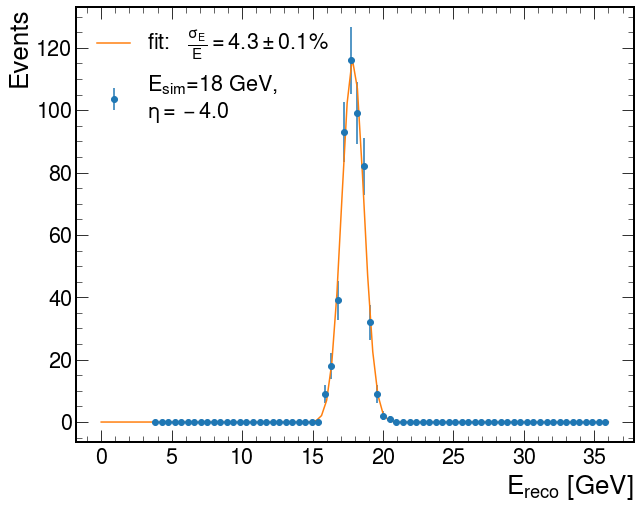

sampling fraction=0.0328
chi2=12.835, ndof=14, pval=0.54


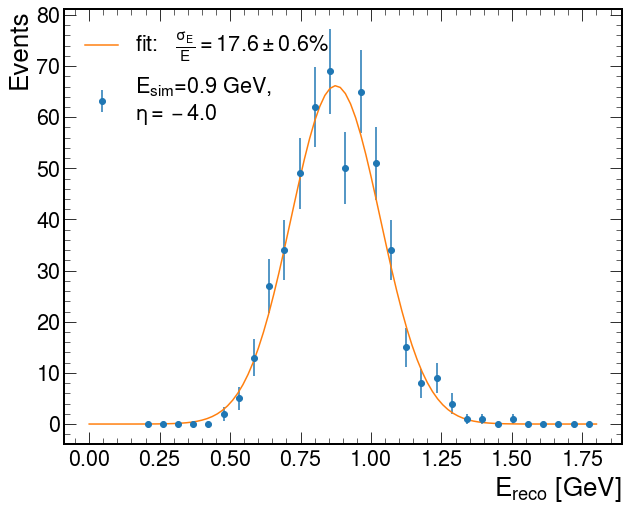

sampling fraction=0.0328
chi2=2.175, ndof=10, pval=0.995


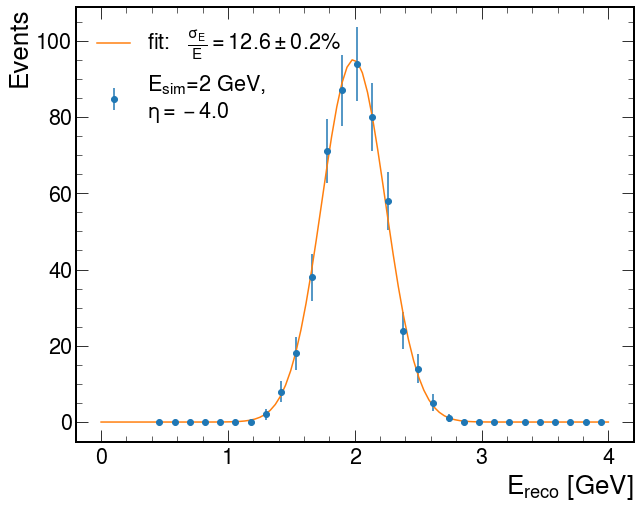

sampling fraction=0.0328
chi2=20.434, ndof=10, pval=0.0254


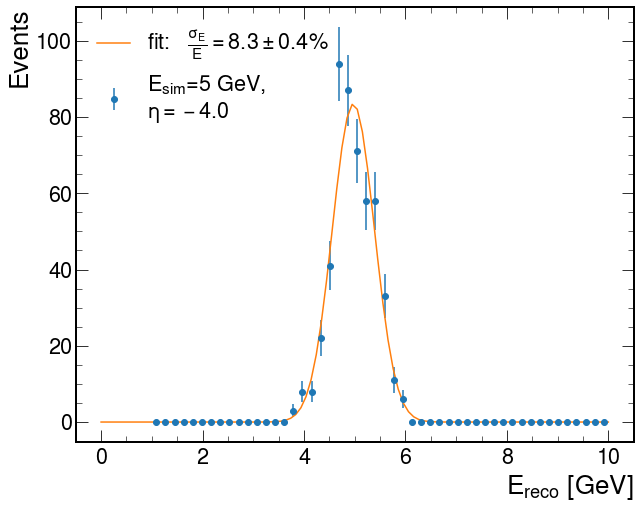

sampling fraction=0.0328
chi2=2.831, ndof=7, pval=0.9


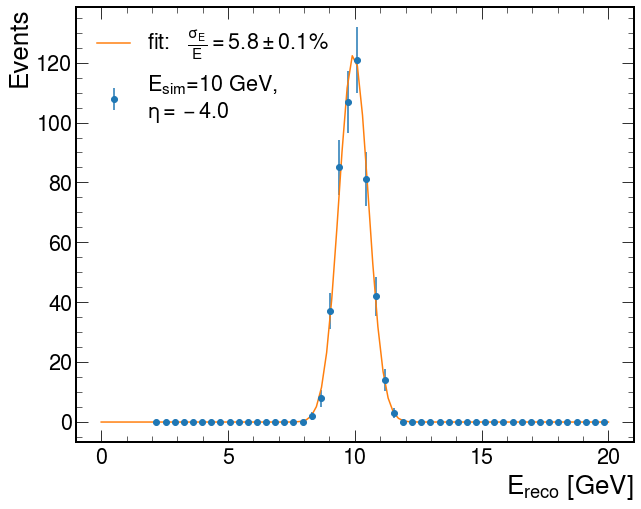

chi2=3.488, ndof=3, pval=0.322


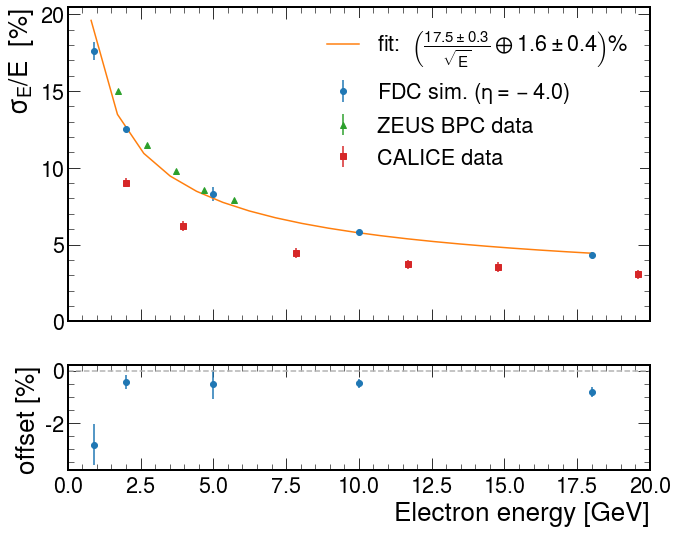

In [13]:
clearance=0.5
R1=4.53
z=-307

sf=0.0328
var="E"
Eresfracs=[]
dEresfracs=[]

mus=[]
dmus=[]

energies=  (18,0.9, 2, 5, 10) if var == "E" else (5,)

#check all values of theta that have been simulated
all_thetas=[]
for key in arrays:
    if key[0]==5:

        all_thetas.append(key[1])
all_thetas=np.array(sorted(all_thetas))[:-2]

thetas= all_thetas if var == "theta" else (178,)
Esums={}

for theta in thetas:

    for E in energies:

        fnc=gauss
        Esums[E]=[]
        for event in range(len(arrays[(E,"no_beampipe",theta)])):
            Esum=np.sum(arrays[(E, "no_beampipe",theta)]['BackwardsEcalInsertHitsReco.energy'][event,:])
            #print(Esum)
            MC_E=np.sqrt(sum(arrays[(E,"no_beampipe",theta)][f"MCParticles.momentum.{a}"][event,2]**2 for a in "xyz"))
            #print(MC_E)
            Esums[E].append(Esum)

        Esums[E]=np.array(Esums[E])
        if sf==None:
            sf=np.mean(Esums[E][Esums[E]>0.1*np.mean(Esums[E])])/E
        print(f"sampling fraction={sf:.4f}")
        Ereco=Esums[E]/sf
        #print(Ereco)
        #print(sf)
        h,x=np.histogram(Ereco, bins=30 if E<5 else 50 if E<18 else 70, range=(0.2*E, 2*E))
        #print(h,x)
        bc=(x[1:]+x[:-1])/2
        p0=[E,np.mean(Ereco), np.std(Ereco)*.8]


        slc=(h>0) & (abs(bc-np.mean(Ereco))<3*np.std(Ereco))

        coeff, var_matrix = curve_fit(fnc, bc[slc], h[slc], p0=p0,
                                 sigma=np.sqrt(h[slc]))
        plt.subplots(1,1)
        plt.errorbar(bc, h, np.sqrt(h), marker='o', ls='', 
                     label=f'$E_{{\\rm sim}}$={E} GeV,\n$\\eta=-4.0$' if var=='E'\
                    else f'$E_{{\\rm sim}}$={E} GeV,\n$\\theta={theta:.3f}^{{\\circ}}$')

        Eresfracs.append(coeff[2]/E)
        dEresfracs.append(np.sqrt(var_matrix[2][2])/E)

        mus.append(coeff[1]/E)
        dmus.append(np.sqrt(var_matrix[1][1])/E)

        x=np.linspace(0, 2*E, 100)
        plt.plot(x, fnc(x,*coeff), label=f"fit:   $\\frac{{\\sigma_E}}{{E}}={100*Eresfracs[-1]:.1f}\\pm {100*dEresfracs[-1]:.1f}\%$")
        chi2=sum((fnc(bc[slc],*coeff)-h[slc])**2/h[slc])
        ndof = len(bc[slc])-len(coeff)
        from scipy.stats import chi2 as c2
        print(f"chi2={chi2:.3f}, ndof={ndof}, pval={c2.sf(chi2,ndof):.3}")
        plt.xlabel("$E_{\\rm reco}$ [GeV]")
        plt.ylabel("Events")
        plt.legend(loc='upper left')
        if var=='E':
            plt.savefig(f"images/E_res_slice_{E}_GeV.pdf")
        plt.show()

mus=np.array(mus)
dmus=np.array(dmus)

Eresfracs=np.array(Eresfracs)
dEresfracs=np.array(dEresfracs)

fig,axs= plt.subplots(2,1, gridspec_kw=dict(height_ratios=[3,1]),sharex='all')
plt.sca(axs[0])
plt.errorbar(energies, Eresfracs*100, np.array(dEresfracs)*100, marker='o', ls='',label='FDC sim. ($\\eta=-4.0$)')
plt.xlim(0, 20)

axs[1].set_xlabel("Electron energy [GeV]")

from scipy.optimize import curve_fit
p0=[0.17,0.1]
fnc=lambda x, a,b: np.hypot(a/np.sqrt(x), b)
coeff, var_matrix = curve_fit(fnc, energies, Eresfracs, p0=p0,
                             sigma=dEresfracs)
coeff_E=coeff
label=f'fit:  $\\left(\\frac{{{100*coeff[0]:.1f}\\pm {100*np.sqrt(var_matrix[0][0]):.1f}}}{{\\sqrt{{E}}}}'
label+=f"\\oplus {100*coeff_E[1]:.1f}\\pm {100*np.sqrt(var_matrix[1][1]):.1f}\\right)\%$"

# if not var_matrix[0][0] < 100:
#     p0=[0.17]
#     fnc=lambda x, a: a/np.sqrt(x)
#     coeff, var_matrix = curve_fit(fnc, energies, Eresfracs, p0=p0,
#                              sigma=dEresfracs)
#     label=f'fit:  $\\frac{{{100*coeff_E[0]:.1f}\\pm {100*np.sqrt(var_matrix[0][0]):.1f}}}{{\\sqrt{{E}}}}$%'



chi2=sum((fnc(energies,*coeff)-Eresfracs)**2/dEresfracs**2)
ndof = len(energies)-len(coeff_E)
from scipy.stats import chi2 as c2
print(f"chi2={chi2:.3f}, ndof={ndof}, pval={c2.sf(chi2,ndof):.3}")

x=np.linspace(0.8, 18, 20)

plt.plot(x, 100*fnc(x, *coeff_E), label=label)
axs[1].errorbar(energies, np.array(mus)*100-100, np.array(dmus)*100, marker='o', ls='')
plt.errorbar([1.72, 2.71, 3.70, 4.69, 5.70], 100*np.array([0.150, 0.115, 0.0976, 0.0855, 0.0788]), [0]*5,
        label="ZEUS BPC data", ls='', marker='^')
plt.errorbar(df_CALICE.E, df_CALICE.res, df_CALICE.dres, ls='', marker='s', label="CALICE data")


#now cache this for later; the energy resolution as a function of E
coeff_E=coeff


axs[1].set_ylabel("offset [%]")

#axs[1].set_ylim(-12, 12)
axs[1].axhline(0, ls='--', color='0.7')

plt.ylabel("${\\sigma_E}/{E}$  [%]")
plt.legend(loc= 'upper right' if var == 'E' else 'upper right', facecolor='white', framealpha=1, frameon=1, edgecolor='w')
plt.ylim(0)
plt.tight_layout()
plt.savefig(f"images/E_res_vs_{var}.pdf")
plt.show()

sampling fraction=0.0328
chi2=6.664, ndof=7, pval=0.465
sampling fraction=0.0328
chi2=12.835, ndof=14, pval=0.54
sampling fraction=0.0328
chi2=2.175, ndof=10, pval=0.995
sampling fraction=0.0328
chi2=20.434, ndof=10, pval=0.0254
sampling fraction=0.0328
chi2=2.831, ndof=7, pval=0.9
sampling fraction=0.0328
chi2=10.743, ndof=8, pval=0.217
sampling fraction=0.0328


/usr/local/lib/python3.8/dist-packages/awkward/_connect/numpy.py:395: RuntimeWarning: invalid value encountered in divide
  result = impl(*args, **kwargs)


chi2=43.395, ndof=18, pval=0.000704
sampling fraction=0.0328
chi2=12.703, ndof=11, pval=0.313
sampling fraction=0.0328
chi2=20.998, ndof=15, pval=0.137
sampling fraction=0.0328
chi2=2.854, ndof=6, pval=0.827
theta=178, eta=-4.05, E=18 GeV,  spreadcut eff=1.0
sampling fraction=0.0328
chi2=10.743, ndof=8, pval=0.217


/usr/local/lib/python3.8/dist-packages/awkward/_connect/numpy.py:395: RuntimeWarning: invalid value encountered in divide
  result = impl(*args, **kwargs)


theta=178, eta=-4.05, E=0.9 GeV,  spreadcut eff=0.756
sampling fraction=0.0328
chi2=44.545, ndof=18, pval=0.000482
theta=178, eta=-4.05, E=2 GeV,  spreadcut eff=0.91
sampling fraction=0.0328
chi2=12.703, ndof=11, pval=0.313
theta=178, eta=-4.05, E=5 GeV,  spreadcut eff=0.876
sampling fraction=0.0328
chi2=7.436, ndof=11, pval=0.763
theta=178, eta=-4.05, E=10 GeV,  spreadcut eff=0.986
sampling fraction=0.0328
chi2=3.162, ndof=6, pval=0.788


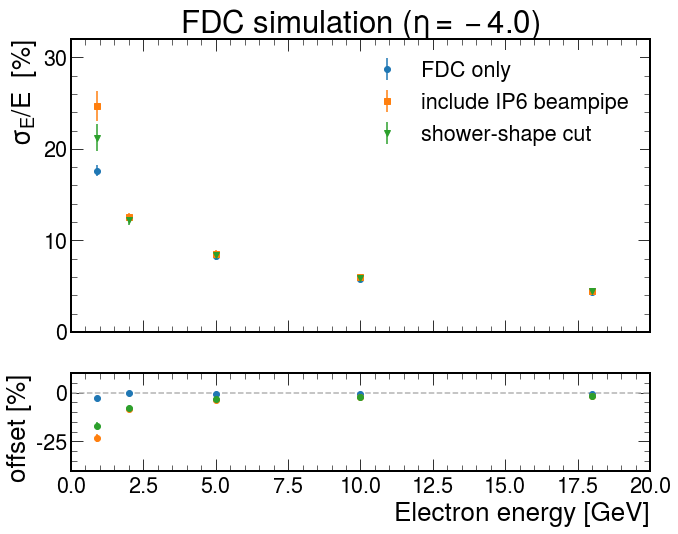

sampling fraction=0.0328
chi2=6.336, ndof=6, pval=0.387
sampling fraction=0.0328
chi2=11.231, ndof=14, pval=0.668
sampling fraction=0.0328
chi2=12.415, ndof=8, pval=0.134
sampling fraction=0.0328
chi2=13.598, ndof=9, pval=0.137
sampling fraction=0.0328
chi2=5.398, ndof=7, pval=0.612
sampling fraction=0.0328
chi2=17.968, ndof=9, pval=0.0355
sampling fraction=0.0328
chi2=32.825, ndof=18, pval=0.0175


/usr/local/lib/python3.8/dist-packages/awkward/_connect/numpy.py:395: RuntimeWarning: invalid value encountered in divide
  result = impl(*args, **kwargs)


sampling fraction=0.0328
chi2=28.481, ndof=14, pval=0.0123
sampling fraction=0.0328
chi2=31.232, ndof=17, pval=0.0187
sampling fraction=0.0328
chi2=8.427, ndof=9, pval=0.492
theta=178.73, eta=-4.50, E=18 GeV,  spreadcut eff=0.938
sampling fraction=0.0328
chi2=11.289, ndof=9, pval=0.256


/usr/local/lib/python3.8/dist-packages/awkward/_connect/numpy.py:395: RuntimeWarning: invalid value encountered in divide
  result = impl(*args, **kwargs)


theta=178.73, eta=-4.50, E=0.9 GeV,  spreadcut eff=0.592
sampling fraction=0.0328
chi2=26.222, ndof=17, pval=0.0705
theta=178.73, eta=-4.50, E=2 GeV,  spreadcut eff=0.476
sampling fraction=0.0328
chi2=19.643, ndof=14, pval=0.142
theta=178.73, eta=-4.50, E=5 GeV,  spreadcut eff=0.642
sampling fraction=0.0328
chi2=14.855, ndof=13, pval=0.317
theta=178.73, eta=-4.50, E=10 GeV,  spreadcut eff=0.836
sampling fraction=0.0328
chi2=6.110, ndof=8, pval=0.635


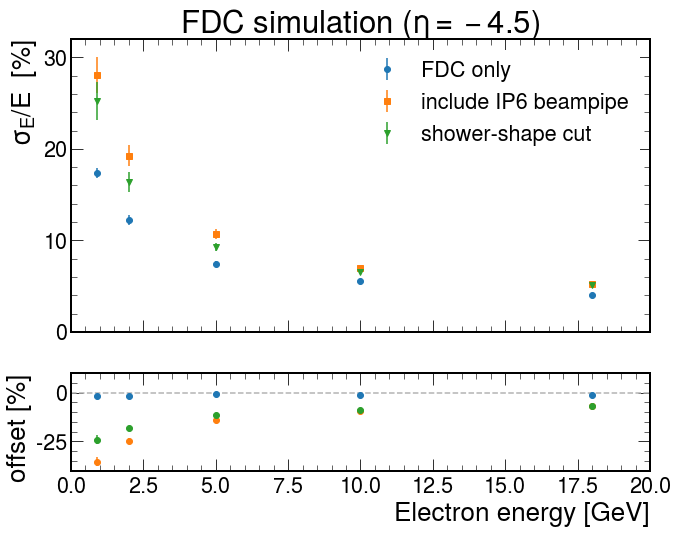

In [14]:
clearance=0.5
R1=4.53
z=-307

sf=0.0328
var="E"

for theta in 178, 178.73:
    fig,axs= plt.subplots(2,1, gridspec_kw=dict(height_ratios=[3,1]),sharex='all')

    for geom, spreadcut in ("no_beampipe", None), ("beampipe", None), ("beampipe", 35):
        Eresfracs=[]
        dEresfracs=[]

        mus=[]
        dmus=[]

        energies=  (18,0.9, 2, 5, 10) if var == "E" else (5,)


        Esums={}

    

        for E in energies:
            spread=get_spread(arrays[(E,geom,theta)])
            fnc=gauss
            Esums[E]=[]
            for event in range(len(arrays[(E,geom,theta)])):
                Esum=np.sum(arrays[(E, geom, theta)]['BackwardsEcalInsertHitsReco.energy'][event,:])
                #print(Esum)
                MC_E=np.sqrt(sum(arrays[(E,geom,theta)][f"MCParticles.momentum.{a}"][event,2]**2 for a in "xyz"))
                #print(MC_E)
                if spreadcut is not None and spread[event]>spreadcut:
                    continue
                Esums[E].append(Esum)
            if spreadcut:
                print(f"theta={theta}, eta={get_eta(theta*np.pi/180):.2f}, E={E} GeV,  spreadcut eff={len(Esums[E])/len(arrays[(E,geom, theta)])}")
            
            Esums[E]=np.array(Esums[E])
            if sf==None:
                sf=np.mean(Esums[E][Esums[E]>0.1*np.mean(Esums[E])])/E
            print(f"sampling fraction={sf:.4f}")
            Ereco=Esums[E]/sf
            #print(Ereco)
            #print(sf)
            h,x=np.histogram(Ereco, bins=30 if E<5 else 50 if E<18 else 70, range=(0.2*E, 2*E))
            #print(h,x)
            bc=(x[1:]+x[:-1])/2
            p0=[E,np.mean(Ereco), np.std(Ereco)*.8]


            slc=(h>0) & (abs(bc-np.mean(Ereco))<3*np.std(Ereco))

            coeff, var_matrix = curve_fit(fnc, bc[slc], h[slc], p0=p0,
                                     sigma=np.sqrt(h[slc]))
            #plt.subplots(1,1)
            #plt.errorbar(bc, h, np.sqrt(h), marker='o', ls='', 
            #             label=f'$E_{{\\rm sim}}$={E} GeV,\n$\\eta=-4.0$' if var=='E'\
            #            else f'$E_{{\\rm sim}}$={E} GeV,\n$\\theta={theta:.3f}^{{\\circ}}$')

            Eresfracs.append(coeff[2]/E)
            dEresfracs.append(np.sqrt(var_matrix[2][2])/E)

            mus.append(coeff[1]/E)
            dmus.append(np.sqrt(var_matrix[1][1])/E)

            x=np.linspace(0, 2*E, 100)
            #plt.plot(x, fnc(x,*coeff), label=f"fit:   $\\frac{{\\sigma_E}}{{E}}={100*Eresfracs[-1]:.1f}\\pm {100*dEresfracs[-1]:.1f}\%$")
            chi2=sum((fnc(bc[slc],*coeff)-h[slc])**2/h[slc])
            ndof = len(bc[slc])-len(coeff)
            from scipy.stats import chi2 as c2
            print(f"chi2={chi2:.3f}, ndof={ndof}, pval={c2.sf(chi2,ndof):.3}")
            #plt.xlabel("$E_{\\rm reco}$ [GeV]")
            #plt.ylabel("Events")
            #plt.legend(loc='upper left')
            #if var=='E':
            #    plt.savefig(f"images/E_res_slice_{E}_GeV.pdf")
            #plt.show()

        mus=np.array(mus)
        dmus=np.array(dmus)

        Eresfracs=np.array(Eresfracs)
        dEresfracs=np.array(dEresfracs)

        plt.sca(axs[0])
        if geom=="no_beampipe":
            arg=dict(marker='o', ls='',label='FDC only')
        elif geom == "beampipe" and not spreadcut:
            arg=dict(marker='s', ls='',label="include IP6 beampipe")
        else:
            arg=dict(marker='v', ls='',label="shower-shape cut")
        plt.errorbar(energies, Eresfracs*100, np.array(dEresfracs)*100, **arg)
        axs[1].errorbar(energies, np.array(mus)*100-100, np.array(dmus)*100, marker='o', ls='')
    plt.xlim(0, 20)

    axs[1].set_xlabel("Electron energy [GeV]")

    
    
    axs[0].set_title(f"FDC simulation ($\\eta={get_eta(theta*np.pi/180):.1f}$)")
    axs[1].set_ylabel("offset [%]")

    #axs[1].set_ylim(-12, 12)
    axs[1].axhline(0, ls='--', color='0.7')

    plt.ylabel("${\\sigma_E}/{E}$  [%]")
    plt.legend(loc= 'upper right' if var == 'E' else 'upper right', facecolor='white', framealpha=1, frameon=1, edgecolor='w')
    plt.ylim(0, 32)
    axs[1].set_ylim(-40, 10)
    plt.tight_layout()
    plt.savefig(f"images/E_res_vs_{var}_beampipe_{theta}.pdf")
    plt.show()